<a href="https://colab.research.google.com/github/seohyeon1578/TensorFlow/blob/main/dlEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

In [21]:
# AND 게이트
import numpy as np

def AND(x1, x2) :
  w1, w2, theta = 0.5, 0.5, 0.8   # theta : 임계값
  tmp = w1 * x1 + w2 * x2
  if tmp <= theta :
    return 0
  elif tmp > theta :
    return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


# 손글씨 숫자 데이터 인식하는 딥러닝 모델

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
tf.__version__

'2.8.2'

In [24]:
keras.__version__

'2.8.0'

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
 
import numpy as np                 
import matplotlib.pyplot as plt

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [27]:
# 첫번째 연습 데이터 확인
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
# 첫 번째 테스트 데이터 확인
y_train[0]

5

In [29]:
# 딥러닝 모델이 원하는 형태로 데이터를 전처리
# 벡터화
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# 부동소수점화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 정규화
X_train /= 255                   
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [30]:
# 레이블 데이터 원-핫 인코딩 처리
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", y_train.shape)
print("Y Testing matrix shape", y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [31]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
# 모델 생성 - 순전파
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-tr

In [33]:
# 모델 생성 - 역전파
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#학습
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2212 - accuracy: 0.9346
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0813 - accuracy: 0.9749
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0148 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0173 - accuracy: 0.9943
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0125 - accura

In [34]:
# 새로운 데이터를 통해 모델의 현재 수준을 평가
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0866 - accuracy: 0.9796
Test score: 0.08661054074764252
Test accuracy: 0.9796000123023987


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=1) 
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

# Fashion MNIST

In [101]:
# 데이터 로딩
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [91]:
# 출력될 클래스 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [92]:
# 데이터 살펴보기
X_train.shape

(60000, 28, 28)

In [102]:
y_train.shape

(60000,)

In [94]:
# 훈련데이터, 검증데이터로 분리 - 정규화, 부동소수점형
X_train = X_train / 255.0
y_train = y_test / 255.0

In [95]:
# 모델 생성
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


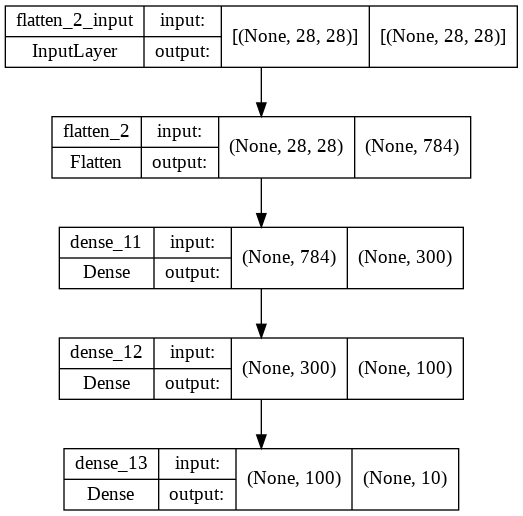

In [97]:
keras.utils.plot_model(model, 'fashion_mnist_model.png', show_shapes=True)

In [98]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
# 학습
history = model.fit(X_train, y_train, epochs=30, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.5187 - accuracy: 0.7613
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5399 - accuracy: 0.8143
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4479 - accuracy: 0.8404
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4193 - accuracy: 0.8495
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4119 - accuracy: 0.8543
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3907 - accuracy: 0.8601
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3916 - accuracy: 0.8633
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3691 - accuracy: 0.8666
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3627 - accuracy: 0.8710
Epoch 10/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

In [105]:
# 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.8651


[0.45114365220069885, 0.8651000261306763]